!pip install pymysql

 # Database Setup And Import 
 

In [3]:
import pymysql 
conn=pymysql.connect(host='localhost', user='root', password='rehan123rehan123',database='crime_data')
conn


In [4]:
import pandas as pd

In [5]:
query='SELECT * FROM crime_data.crime;'

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_sql(query,conn)
print(df)

         DR_NO   Date_Rptd    DATE_OCC    AREA_NAME  Crm_Cd  \
0     10304468  01-08-2020  01-08-2020    Southwest     624   
1    190101086  01-02-2020  01-01-2020      Central     624   
2    191501505  01-01-2020  01-01-2020  N Hollywood     745   
3    191921269  01-01-2020  01-01-2020      Mission     740   
4    200100502  01-02-2020  01-02-2020      Central     442   
..         ...         ...         ...          ...     ...   
494  200106614  02-07-2020  02-07-2020      Central     624   
495  200106615  02-07-2020  02-07-2020      Central     624   
496  200106616  02-07-2020  02-07-2020      Central     624   
497  200106617  02-07-2020  01-10-2020      Central     510   
498  200106618  02-07-2020  02-03-2020      Central     745   

                                           Crm_Cd_Desc  Vict_Age Vict_Sex  \
0                             BATTERY - SIMPLE ASSAULT        36        F   
1                             BATTERY - SIMPLE ASSAULT        25        M   
2           

In [9]:
print(df.shape)

(499, 13)


# Data Exploration ( Retrieve basic statistics on the dataset, such as the total number of records and unique values in specific columns.)

# Unique value in specific column

In [10]:
df=pd.DataFrame(df)
unique_value=df['Crm_Cd'].unique()
print(unique_value)

[624 745 740 442 946 341 330 930 648 354 230 761 350 310 480 623 440 510
 210 900 888 420 886 421 647 940 662 220 625 755 649 901 320 890 351 956
 820 812 920 850 666 343]


In [11]:
df=pd.DataFrame(df)
unique_value_1=df['AREA_NAME'].unique()
print(unique_value_1)

['Southwest' 'Central' 'N Hollywood' 'Mission' 'Van Nuys' 'Wilshire'
 'Rampart' 'Harbor' 'Pacific' 'Hollenbeck' 'West LA' 'Northeast'
 'Foothill' 'Hollywood' 'West Valley' '77th Street' 'Olympic' 'Devonshire'
 'Southeast']


In [12]:
df=pd.DataFrame(df)
unique_value_2=df['DATE_OCC'].unique()
print(unique_value_2)

['01-08-2020' '01-01-2020' '01-02-2020' '01-04-2020' '01-05-2020'
 '01-07-2020' '09-09-2020' '12-03-2020' '02-04-2020' '02-06-2020'
 '12-11-2020' '02-08-2020' '12-07-2020' '11-12-2020' '12-02-2020'
 '01-03-2020' '06-10-2020' '11-07-2020' '01-06-2020' '03-02-2020'
 '11-01-2020' '01-09-2020' '05-11-2020' '07-09-2020' '01-10-2020'
 '02-01-2020' '01-11-2020' '01-12-2020' '12-12-2020' '03-12-2020'
 '04-12-2020' '02-05-2020' '05-10-2020' '06-04-2020' '03-10-2020'
 '10-11-2020' '10-09-2020' '12-09-2020' '02-11-2020' '05-04-2020'
 '02-02-2020' '09-01-2020' '12-05-2020' '08-02-2020' '08-06-2020'
 '04-08-2020' '06-08-2020' '06-11-2020' '04-06-2020' '05-07-2020'
 '03-11-2020' '09-02-2020' '02-03-2020' '07-05-2020' '04-07-2020'
 '10-06-2020' '09-04-2020' '11-04-2020' '09-08-2020' '02-10-2020'
 '02-07-2020']


# Crime Code With Discription

In [13]:
query='select distinct(Crm_Cd),Crm_Cd_desc from crime_data.crime;'
df=pd.read_sql(query,conn)
print(df)

    Crm_Cd                                        Crm_Cd_desc
0      624                           BATTERY - SIMPLE ASSAULT
1      745           VANDALISM - MISDEAMEANOR ($399 OR UNDER)
2      740  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
3      442           SHOPLIFTING - PETTY THEFT ($950 & UNDER)
4      946                          OTHER MISCELLANEOUS CRIME
5      341  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...
6      330                              BURGLARY FROM VEHICLE
7      930             CRIMINAL THREATS - NO WEAPON DISPLAYED
8      648                                              ARSON
9      354                                  THEFT OF IDENTITY
10     230     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
11     761                                    BRANDISH WEAPON
12     350                                      THEFT, PERSON
13     310                                           BURGLARY
14     480                                      BIKE - STOLEN
15     6

# Temporal Analysis

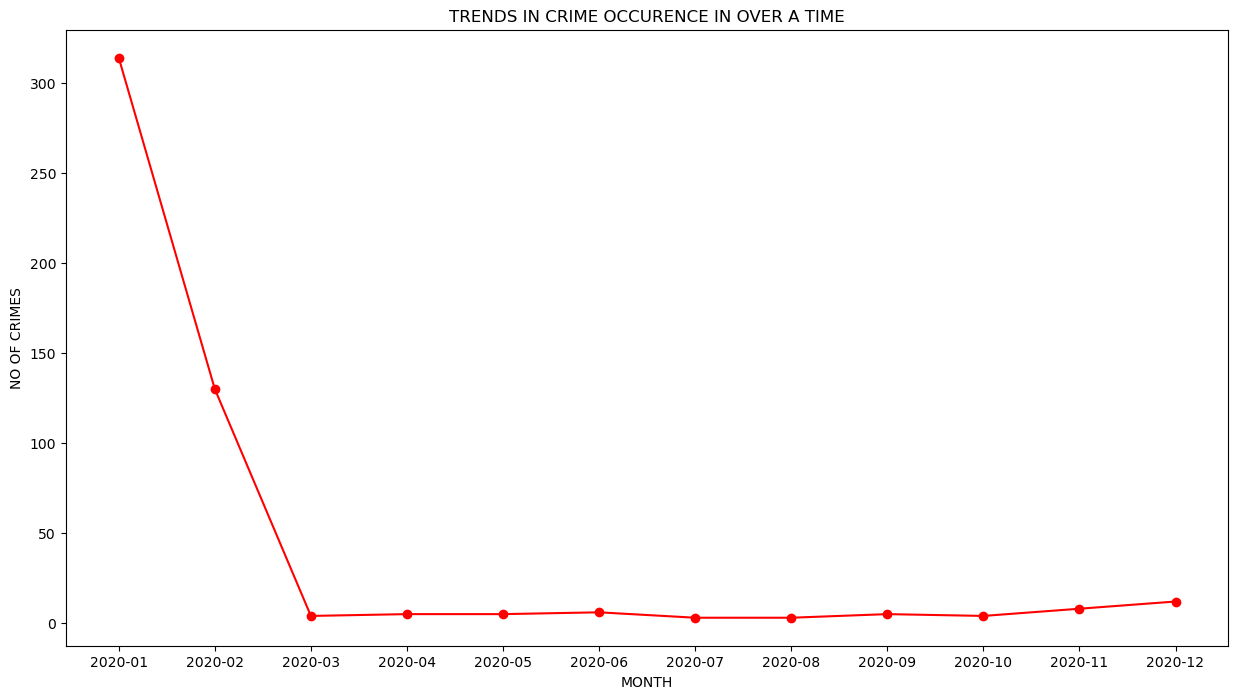

   crm_month  count
0    2020-01    314
1    2020-02    130
2    2020-03      4
3    2020-04      5
4    2020-05      5
5    2020-06      6
6    2020-07      3
7    2020-08      3
8    2020-09      5
9    2020-10      4
10   2020-11      8
11   2020-12     12


In [14]:
import matplotlib.pyplot as plt
query="""
select date_format(str_to_date(date_occ, '%m-%d-%Y'), '%Y-%m') as crm_month,
       COUNT(*) as count 
from crime_data.crime
group by crm_month
order by crm_month;

"""
df = pd.read_sql(query,conn)

plt.figure(figsize=(15,8))
plt.plot(df['crm_month'],df['count'],marker='o',color='red')
plt.title('TRENDS IN CRIME OCCURENCE IN OVER A TIME')
plt.xlabel('MONTH')
plt.ylabel('NO OF CRIMES')
plt.show()
print(df)

 # SPATIAL ANALYSIS  

In [15]:
## Geographical hotspots for reported crime
### LAT
### LON

In [16]:
query = 'select LAT,LON from crime_data.crime where LAT is not null and LON is not null;'

In [17]:
import pandas as pd
df3=pd.read_sql(query,conn)
df3

,LAT,LON
0,34.01,-118.30
1,34.05,-118.25
2,34.17,-118.40
3,34.22,-118.45
4,34.05,-118.26
...,...,...
494,34.05,-118.26
495,34.05,-118.26
496,34.05,-118.25
497,34.05,-118.25


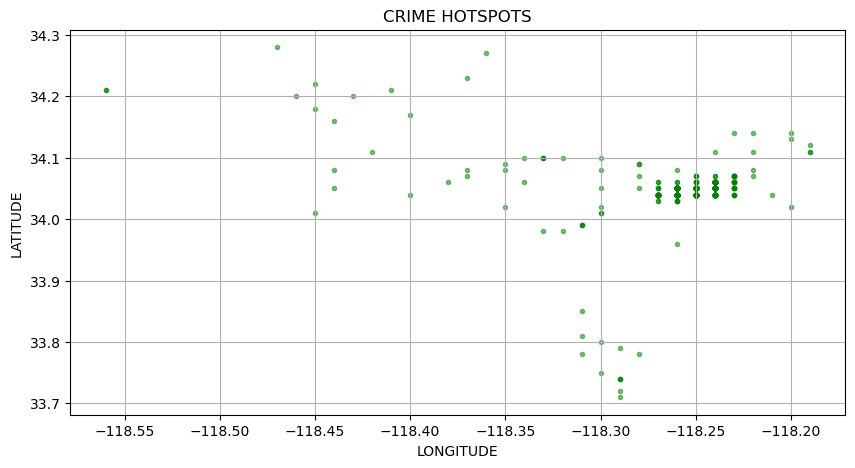

In [18]:
import plotly.express as px 
query='select LAT,LON from crime_data.crime'
df=pd.read_sql(query,conn)

plt.figure(figsize=(10,5))
plt.scatter(df['LON'], df['LAT'], alpha=0.5, marker='.', color='green')
plt.title('CRIME HOTSPOTS')
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
plt.grid(True)
plt.show()



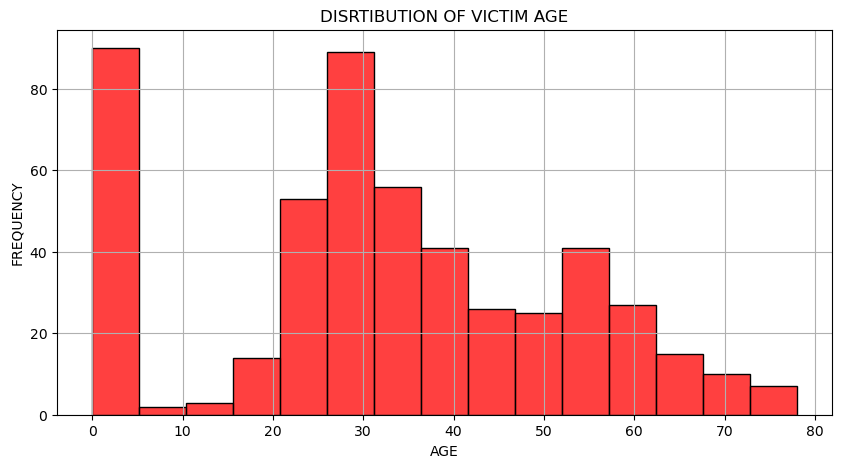

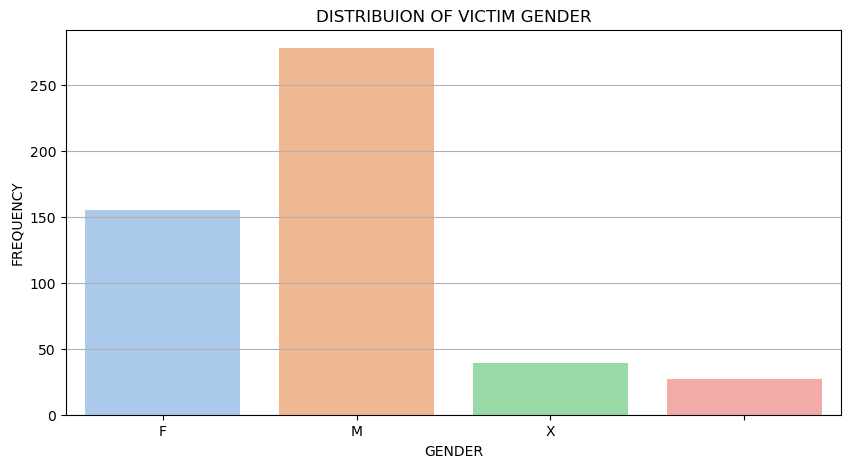

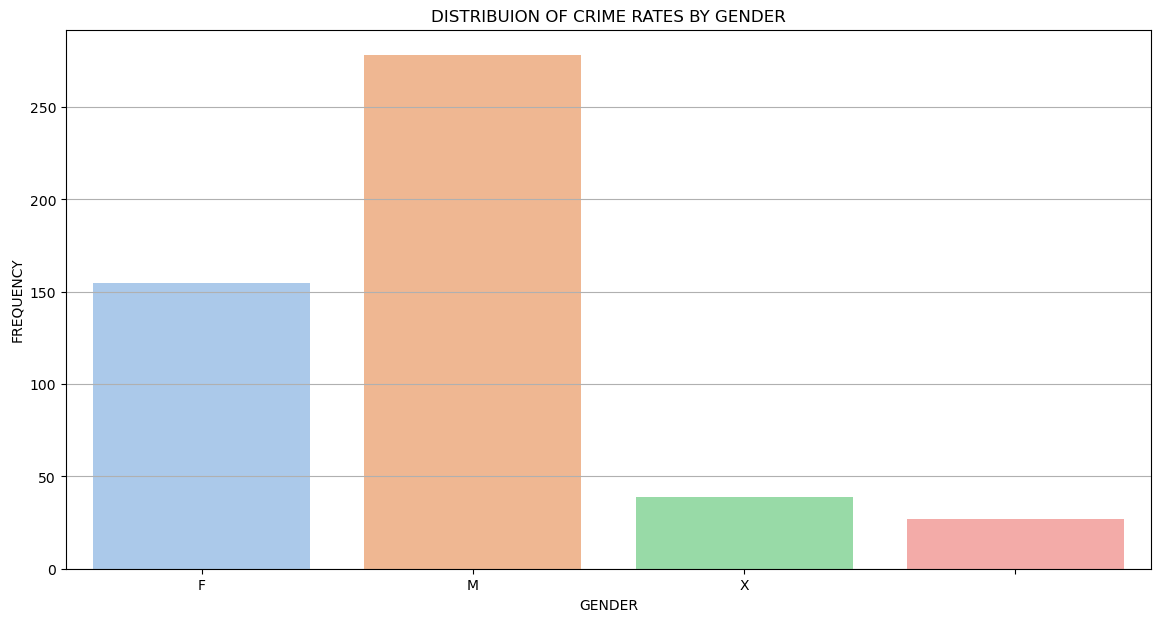

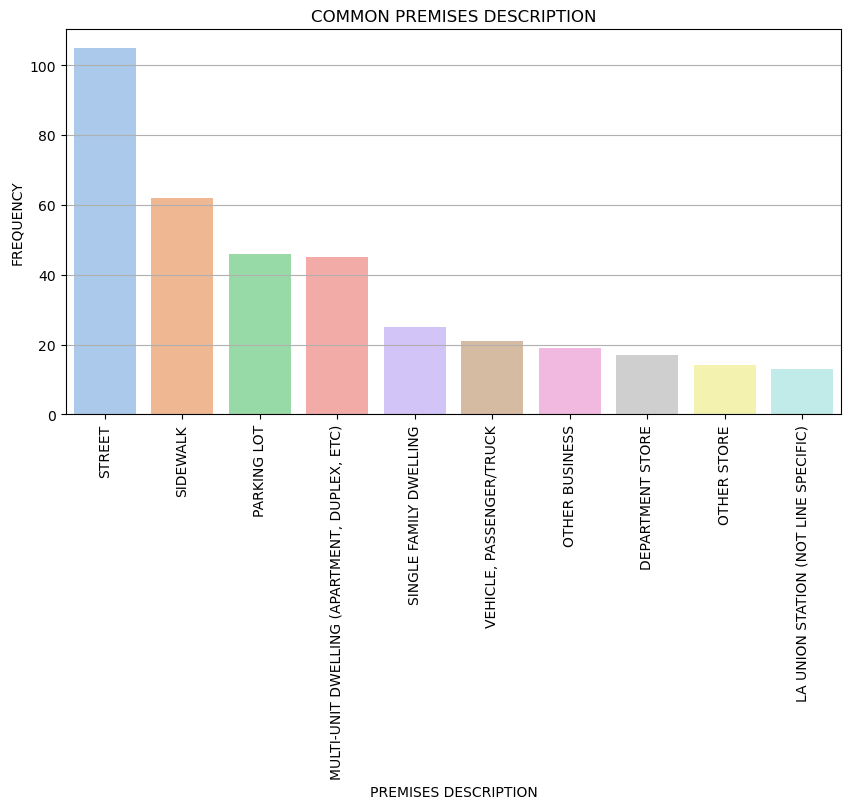

In [20]:
import seaborn as sns
query='select Vict_Age, Vict_Sex, Premis_Desc from crime_data.crime;'
df=pd.read_sql(query,conn)

## DATA CLEANING :Handle mising values
df.dropna(subset=['Vict_Age', 'Vict_Sex'], inplace=True)

## DISTRIBUTION OF VICTIM AGES
plt.figure(figsize=(10,5))
sns.histplot(df['Vict_Age'], bins=15, color='red', edgecolor='black')
plt.title('DISRTIBUTION OF VICTIM AGE')
plt.xlabel('AGE')
plt.ylabel('FREQUENCY')
plt.grid(True)
plt.show()


## DISTRIBUTION OF VICTIM GENDER
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Vict_Sex', palette='pastel')
plt.title('DISTRIBUION OF VICTIM GENDER')
plt.xlabel('GENDER')
plt.ylabel('FREQUENCY')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

## COMPARISON OF CRIME RATES BY GENDER
plt.figure(figsize=(14,7))
sns.countplot(data=df, x='Vict_Sex', palette='pastel')
plt.title('DISTRIBUION OF CRIME RATES BY GENDER')
plt.xlabel('GENDER')
plt.ylabel('FREQUENCY')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

## COMMON PREMISES 
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Premis_Desc', order=df['Premis_Desc'].value_counts().index[:10],palette='pastel')
plt.title('COMMON PREMISES DESCRIPTION')
plt.xlabel('PREMISES DESCRIPTION')
plt.ylabel('FREQUENCY')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


# DIFFERENCE IN CRIME RATES B/W MALE AND FEMALE

In [21]:
## VICTIM SEX

In [22]:
query='select vict_sex from crime_data.crime;'
df=pd.read_sql(query,conn)

In [23]:
import pandas as pd 
df=pd.read_sql(query,conn)
df

,vict_sex
0,F
1,M
2,F
3,X
4,M
...,...
494,M
495,M
496,M
497,F


### TPYES OF GENDER [M],[F],[X],[]

### NO OF MALES INVOLVED IN CRIME

In [24]:
query="select count(*) as male_count from crime_data.crime where Vict_Sex='M';"

In [25]:
df1=pd.read_sql(query,conn)
df1

,male_count
0,278


## NO OF FEMALES INVOLVED IN CRIME

In [26]:
query="select count(*) as female_count from crime_data.crime where Vict_Sex='F';"

In [27]:
df1=pd.read_sql(query,conn)
df1

,female_count
0,155


## LOCATION WHERE MAXIMUM CRIME OCCURS

In [28]:
query=" select location from crime_data.crime where location is not null;"

In [29]:
df=pd.read_sql(query,conn)
df

,location
0,1100 W 39TH PL
1,700 S HILL ST
2,5400 CORTEEN PL
3,14400 TITUS ST
4,700 S FIGUEROA ST
...,...
494,2400 ELLENDALE PL
495,39TH PL
496,2500 W VERNON AV
497,700 EXPOSITION BL


In [30]:
location_counts=df['location'].value_counts()

In [31]:
top_5=location_counts.head(10)
print(top_5)

location
800 N ALAMEDA ST      14
700 W 7TH ST          11
1100 S FIGUEROA ST     6
300 E 5TH ST           6
6TH                    6
100 E 5TH ST           5
600 S SPRING ST        5
500 S SAN PEDRO ST     5
7TH ST                 5
700 S FLOWER ST        4
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

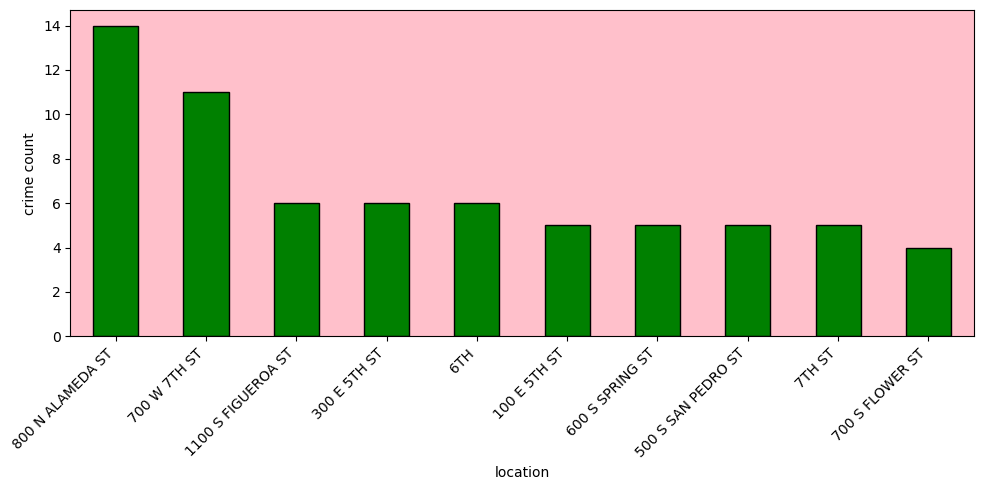

In [32]:
plt.figure(figsize=(10,5))
top_5.plot(kind='bar', color='green',edgecolor='black')
plt.gca().set_facecolor('pink')
plt.xlabel('location')
plt.ylabel('crime count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show

### OBSERVATION
#### 800 N ALMADA ST IS THE LOCATION WHERE MOST CRIME OCCURED

# STATUS DATA

In [33]:
query = "select status from crime_data.crime;"

In [34]:
df=pd.read_sql(query,conn)
df

,status
0,AO
1,IC
2,IC
3,IC
4,IC
...,...
494,IC
495,IC
496,IC
497,IC


### VISUALIZATION OF STATUS DISTRUBUTION

<function matplotlib.pyplot.show(close=None, block=None)>

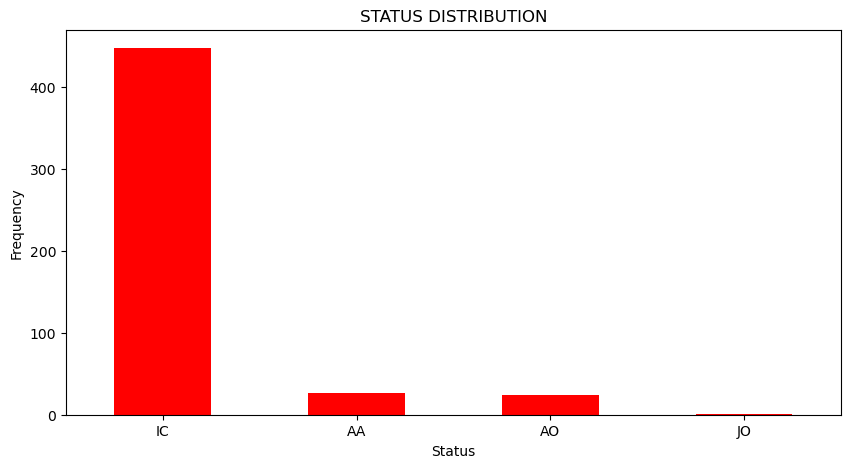

In [35]:
query = "select status from crime_data.crime;"

status_data = pd.read_sql(query,conn)

status_counts = status_data['status'].value_counts()

plt.figure(figsize=(10,5))
status_counts.plot(kind='bar', color='red')
plt.title('STATUS DISTRIBUTION')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show

#### investigation crime has the higest frequency

## QUESTIONS BASED ON OBSERVATION RELATED TO GIVEN DATA SET (CRIME_DATA)

1)   What is the distribution of victim ages in reported crime ?
ANS: There are two victim age groups
     a) AGE GROUP 1-5 YEARS
     b) AGE GROUP 25-30 YEARS

2)   Is there any significant difference in crime rates b/w male and female           victims
ANS: If we come b/w male and female victim we can easily observe that male            victims are more as compare to female victim.

     a) MALE VICTIM: 278
     b) FEMALE VICTIM: 150   

3)   Where do most crimes occurs based on the location ?

    TOP TEN CRIME LOCATION

  location
800 N ALAMEDA ST      1 4
700 W 7TH ST          11
1100 S FIGUEROA ST     6
300 E 5TH ST           6
6TH                    6
100 E 5TH ST           5
600 S SPRING ST        5
500 S SAN PEDRO ST     5
7TH ST                 5
700 S FLOWER ST        4

4)   What is the distribution of reported crimes based on crime code ?

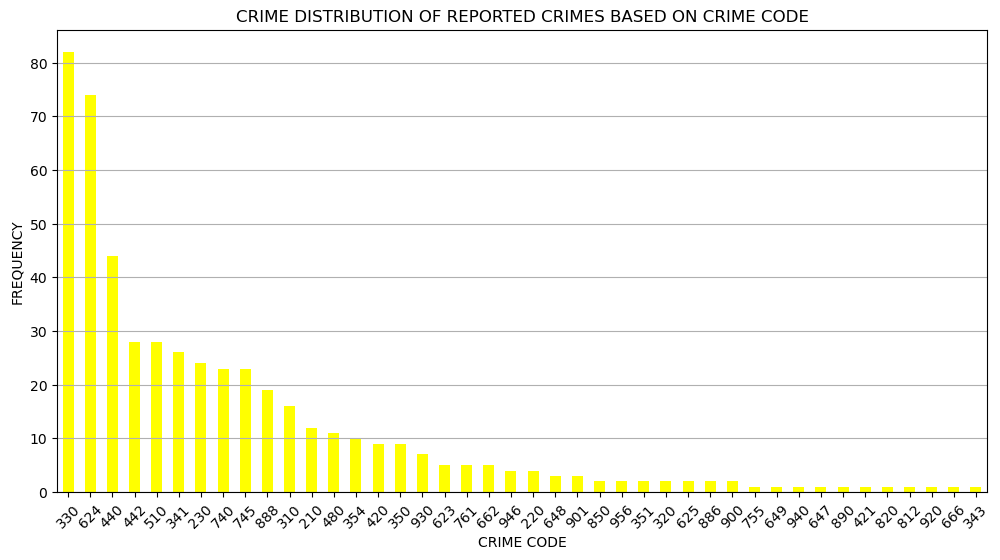

Crime Code Count:
Crm_Cd
330    82
624    74
440    44
442    28
510    28
341    26
230    24
740    23
745    23
888    19
310    16
210    12
480    11
354    10
420     9
350     9
930     7
623     5
761     5
662     5
946     4
220     4
648     3
901     3
850     2
956     2
351     2
320     2
625     2
886     2
900     2
755     1
649     1
940     1
647     1
890     1
421     1
820     1
812     1
920     1
666     1
343     1
Name: count, dtype: int64


In [38]:
query = " select Crm_Cd from crime_data.crime;"
import pandas as pd 
crime_code_data = pd.read_sql(query,conn)
crime_code_counts = crime_code_data['Crm_Cd'].value_counts()

# Visualization of crime disrtibution
plt.figure(figsize=(12,6))
crime_code_counts.plot(kind='bar', color='yellow')
plt.title('CRIME DISTRIBUTION OF REPORTED CRIMES BASED ON CRIME CODE')
plt.xlabel('CRIME CODE')
plt.ylabel('FREQUENCY')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show() 

# Print code counts
print("Crime Code Count:")
print(crime_code_counts)

### CRIME CODE (330) HAS MAXIMUM FREQUENCY

Crm_Cd:    330                              BURGLARY FROM VEHICLE   (Data inferred from crime code discription).